In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
file_path = "Dataset.csv"
df = pd.read_csv(file_path)

In [5]:
# Extract multiple features (X) and target (y)
X = df.iloc[:, :-1].values  # All columns except last as features
y = df.iloc[:, -1].values.reshape(-1, 1)  # Last column as target

In [6]:
# Normalize X for gradient descent
mean_X = X.mean(axis=0)
std_X = X.std(axis=0)
X_norm = (X - mean_X) / std_X  # Feature normalization

# Add bias term (column of ones)
X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]

# Initialize parameters for gradient descent
theta = np.zeros((X_norm.shape[1], 1))  # Theta for multiple features
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations
m = len(y)  # Number of training samples

# Cost function (Mean Squared Error)

In [7]:
def compute_cost(X, y, theta):
    predictions = X @ theta
    error = predictions - y
    return (1 / (2 * m)) * np.sum(error ** 2)

# Gradient Descent function

In [8]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for _ in range(iterations):
        predictions = X @ theta
        error = predictions - y
        gradient = (1 / m) * (X.T @ error)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

Running Gradient Descent

In [14]:
theta_final, cost_history = gradient_descent(X_norm, y, theta, alpha, iterations)
# Convert theta back to original scale
actual_theta = np.zeros(theta_final.shape)
actual_theta[1:] = (theta_final[1:].flatten() / std_X).reshape(-1, 1)  # Ensure shape compatibility
actual_theta[0] = theta_final[0] - np.sum(actual_theta[1:] * mean_X)  # Adjust intercept




y_pred_gd = X @ actual_theta[1:] + actual_theta[0]

# Print final optimized parameters
print("\nOptimized Parameters after Gradient Descent:")
print(f"Intercept (θ₀): {theta_final[0]}")
print(f"Weight Coefficient (θ₁): {theta_final[1]}")
print(f"Age Coefficient (θ₂): {theta_final[2]}")
print(f"Maintenance Coefficient (θ₃): {theta_final[3]}")


Optimized Parameters after Gradient Descent:
Intercept (θ₀): [75.8]
Weight Coefficient (θ₁): [11.35644582]
Age Coefficient (θ₂): [2.71382854]
Maintenance Coefficient (θ₃): [2.47124764]


Plotting

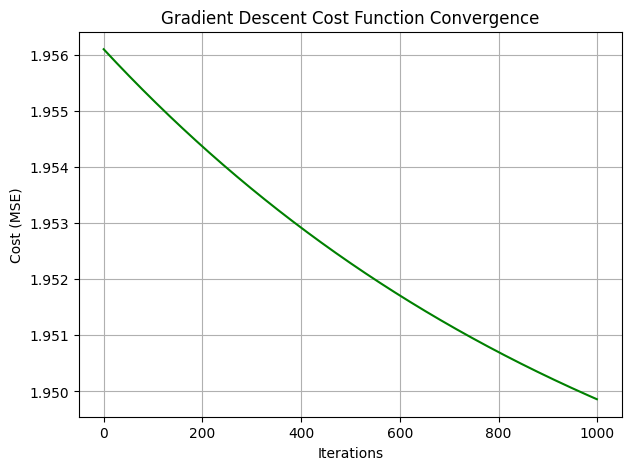

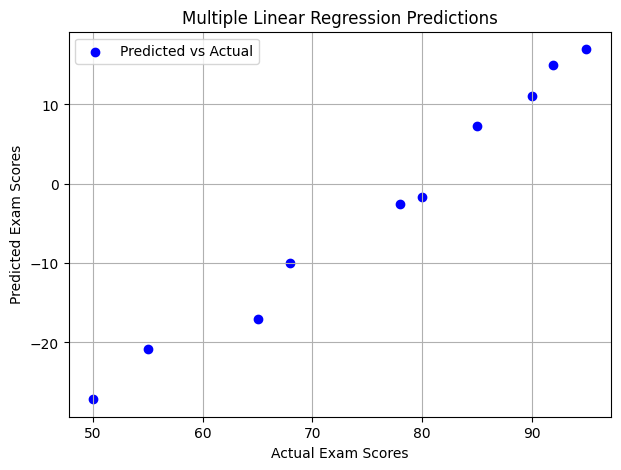


Optimized Parameters (Theta):
Theta 0: [-46.65903134]
Theta 1: [2.71859628]
Theta 2: [0.97420767]
Theta 3: [2.61951726]


In [15]:
plt.figure(figsize=(7, 5))
plt.plot(range(iterations), cost_history, color="green")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost Function Convergence")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(y, y_pred_gd, color="blue", label="Predicted vs Actual")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Multiple Linear Regression Predictions")
plt.legend()
plt.grid(True)
plt.show()

# Print final theta values
print("\nOptimized Parameters (Theta):")
for i in range(len(actual_theta)):
    print(f"Theta {i}: {actual_theta[i]}")
